In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

Matches shape: (1095, 20)
Deliveries shape: (81794, 17)


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81794 entries, 0 to 81793
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          81794 non-null  int64  
 1   inning            81794 non-null  int64  
 2   batting_team      81794 non-null  object 
 3   bowling_team      81794 non-null  object 
 4   over              81793 non-null  float64
 5   ball              81793 non-null  float64
 6   batter            81793 non-null  object 
 7   bowler            81793 non-null  object 
 8   non_striker       81793 non-null  object 
 9   batsman_runs      81793 non-null  float64
 10  extra_runs        81793 non-null  float64
 11  total_runs        81793 non-null  float64
 12  extras_type       4634 non-null   object 
 13  is_wicket         81793 non-null  float64
 14  player_dismissed  4077 non-null   object 
 15  dismissal_kind    4077 non-null   object 
 16  fielder           2939 non-null   object

In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [9]:
matches.isnull().sum().sort_values(ascending=False)

,0
method,1074
city,51
result_margin,19
player_of_match,5
winner,5
target_runs,3
target_overs,3
id,0
date,0
season,0


In [11]:
matches['method'] = matches['method'].fillna('Normal')

In [12]:
matches['city'] = matches['city'].fillna('Unknown')

In [10]:
deliveries.isnull().sum().sort_values(ascending=False)

,0
fielder,78855
dismissal_kind,77717
player_dismissed,77717
extras_type,77160
total_runs,1
over,1
bowler,1
batter,1
ball,1
is_wicket,1


In [14]:
deliveries['fielder'] = deliveries['fielder'].fillna('Not Applicable')

In [15]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')

In [16]:
deliveries = deliveries.dropna(subset=[
    'total_runs', 'over', 'ball', 'batter', 'bowler',
    'non_striker', 'extra_runs', 'batsman_runs', 'is_wicket'
])

In [17]:
matches['date'] = pd.to_datetime(matches['date'])

In [18]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants'
}

matches.replace(team_name_mapping, inplace=True)
deliveries.replace(team_name_mapping, inplace=True)

In [20]:
matches_clean = matches.dropna(subset=['winner'])
matches_clean.shape

(1090, 20)

In [26]:
matches_clean.to_csv("matches_clean.csv", index=False)

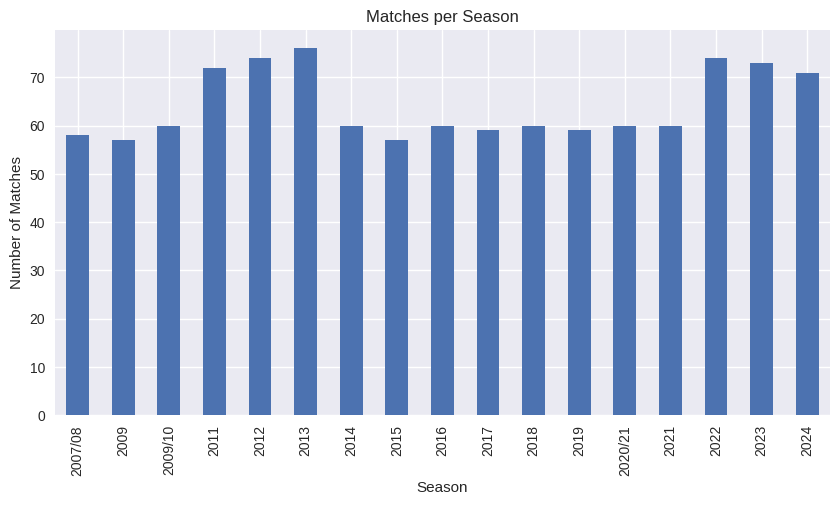

In [27]:
plt.figure(figsize=(10,5))
matches_clean['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()

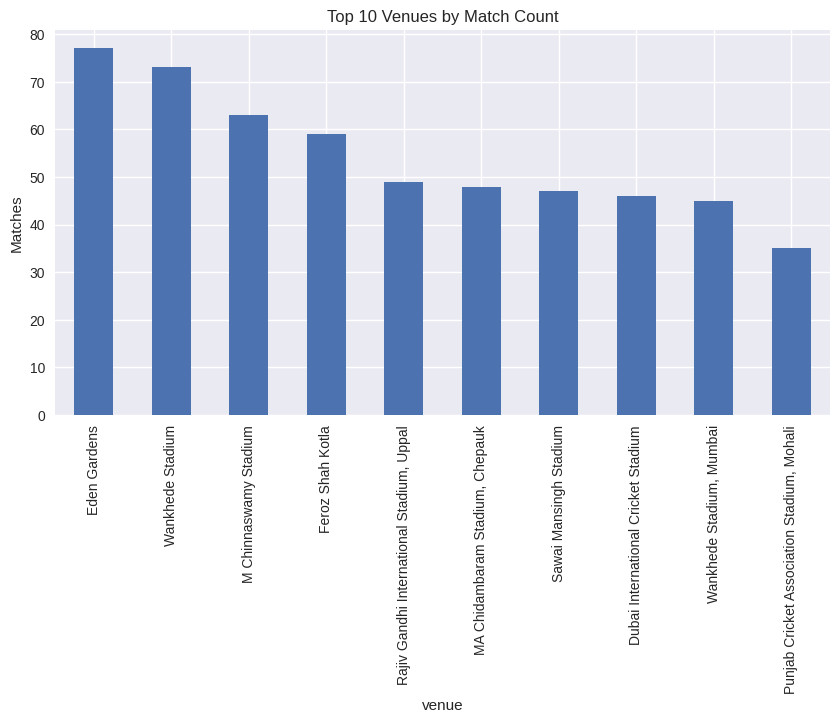

In [28]:
plt.figure(figsize=(10,5))
matches_clean['venue'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Venues by Match Count")
plt.ylabel("Matches")
plt.show()

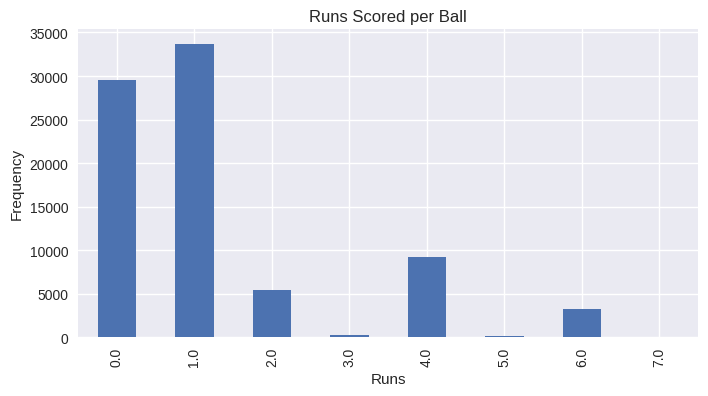

In [30]:
plt.figure(figsize=(8,4))
deliveries['total_runs'].value_counts().sort_index().plot(kind='bar')
plt.title("Runs Scored per Ball")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

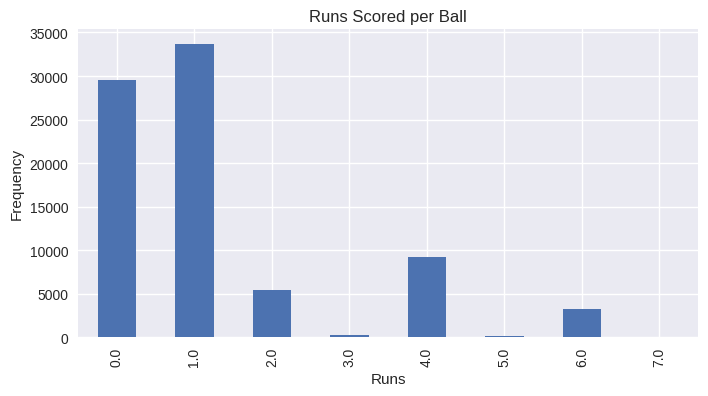

In [32]:
plt.figure(figsize=(8,4))
deliveries['total_runs'].value_counts().sort_index().plot(kind='bar')
plt.title("Runs Scored per Ball")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

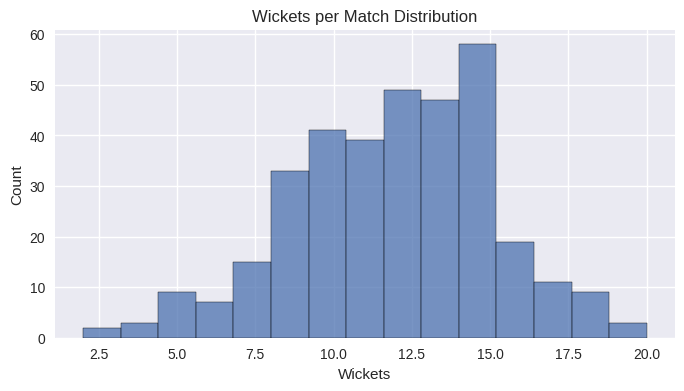

In [34]:
wickets_per_match = deliveries.dropna(subset=['player_dismissed']) \
    .groupby('match_id').size()

plt.figure(figsize=(8,4))
sns.histplot(wickets_per_match, bins=15)
plt.title("Wickets per Match Distribution")
plt.xlabel("Wickets")
plt.show()

In [36]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum() \
    .sort_values(ascending=False).head(10)

top_batsmen

,batsman_runs
batter,
SK Raina,2340.0
G Gambhir,2300.0
RG Sharma,2132.0
SR Tendulkar,2116.0
JH Kallis,2046.0
CH Gayle,2024.0
V Sehwag,1916.0
MS Dhoni,1890.0
V Kohli,1872.0


In [37]:
top_bowlers = deliveries.dropna(subset=['player_dismissed']) \
    .groupby('bowler').size() \
    .sort_values(ascending=False).head(10)

top_bowlers

,0
bowler,
SL Malinga,96
RP Singh,87
A Mishra,86
IK Pathan,83
PP Ojha,83
R Vinay Kumar,82
MM Patel,81
PP Chawla,80
JA Morkel,78
